#### IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Loading Datasets

In [3]:
df = pd.read_csv('advertising.csv')

In [3]:
print(df.head())



      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

In [ ]:
print(df.describe())

In [ ]:
print(df.info())

In [10]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

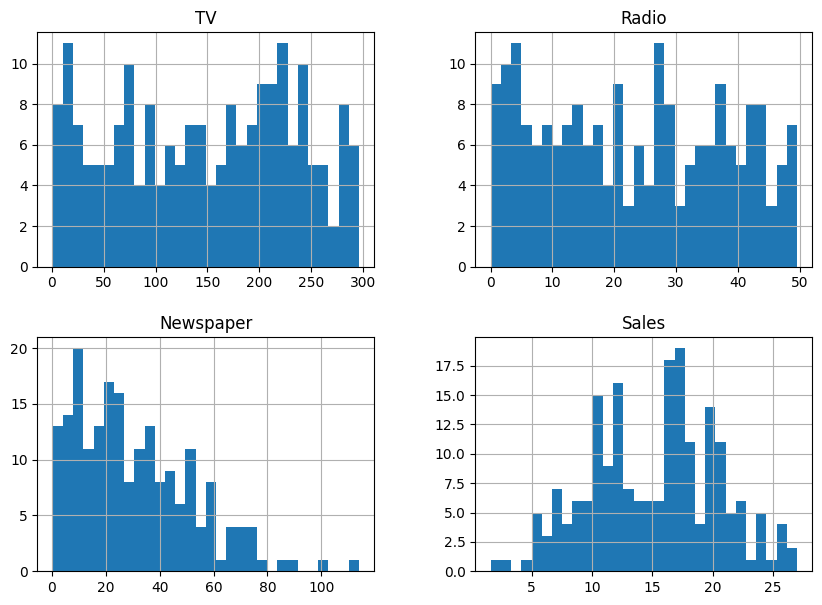

In [11]:
df.hist(bins=30, figsize=(10, 7))
plt.show()

/tmp/ipykernel_10880/3077622747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Newspaper"])


<Axes: xlabel='Newspaper', ylabel='Density'>

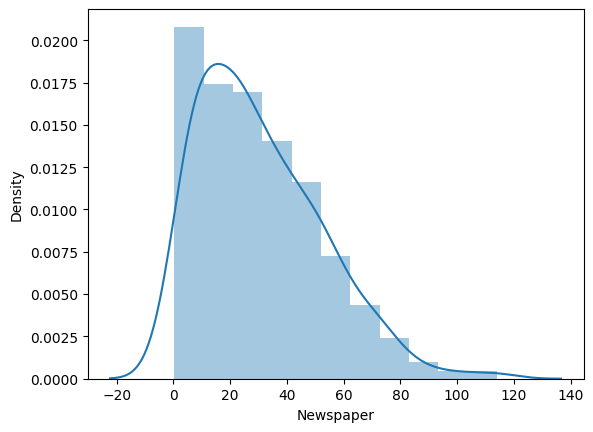

In [5]:
sns.distplot(df["Newspaper"])

/tmp/ipykernel_10880/776149866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TV"])


<Axes: xlabel='TV', ylabel='Density'>

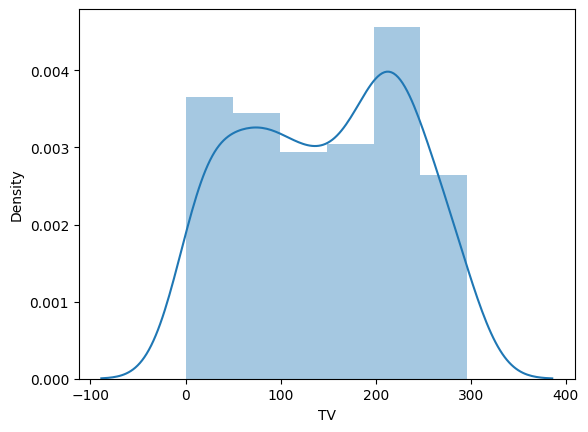

In [6]:
sns.distplot(df["TV"])

/tmp/ipykernel_10880/825677950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Radio"])


<Axes: xlabel='Radio', ylabel='Density'>

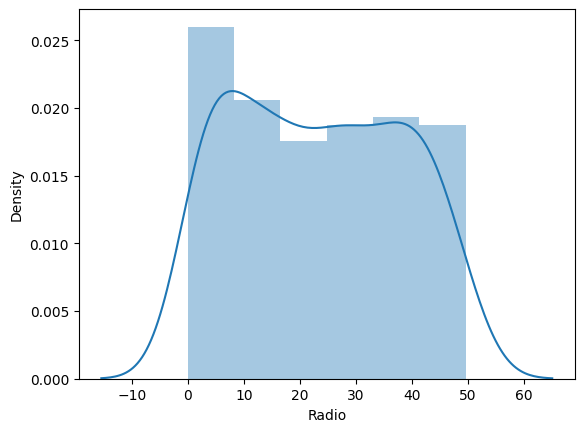

In [7]:
sns.distplot(df["Radio"])

/tmp/ipykernel_10880/497969085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sales"])


<Axes: xlabel='Sales', ylabel='Density'>

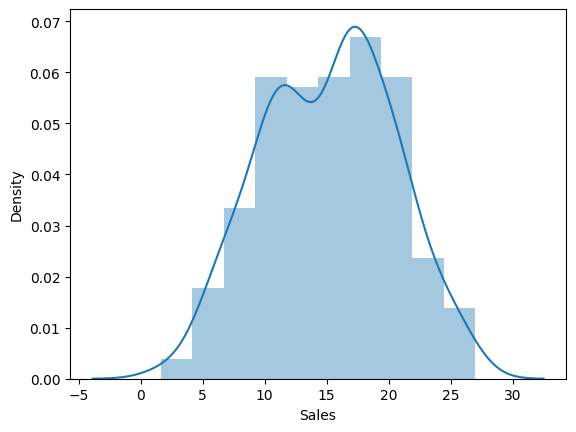

In [8]:
sns.distplot(df["Sales"])

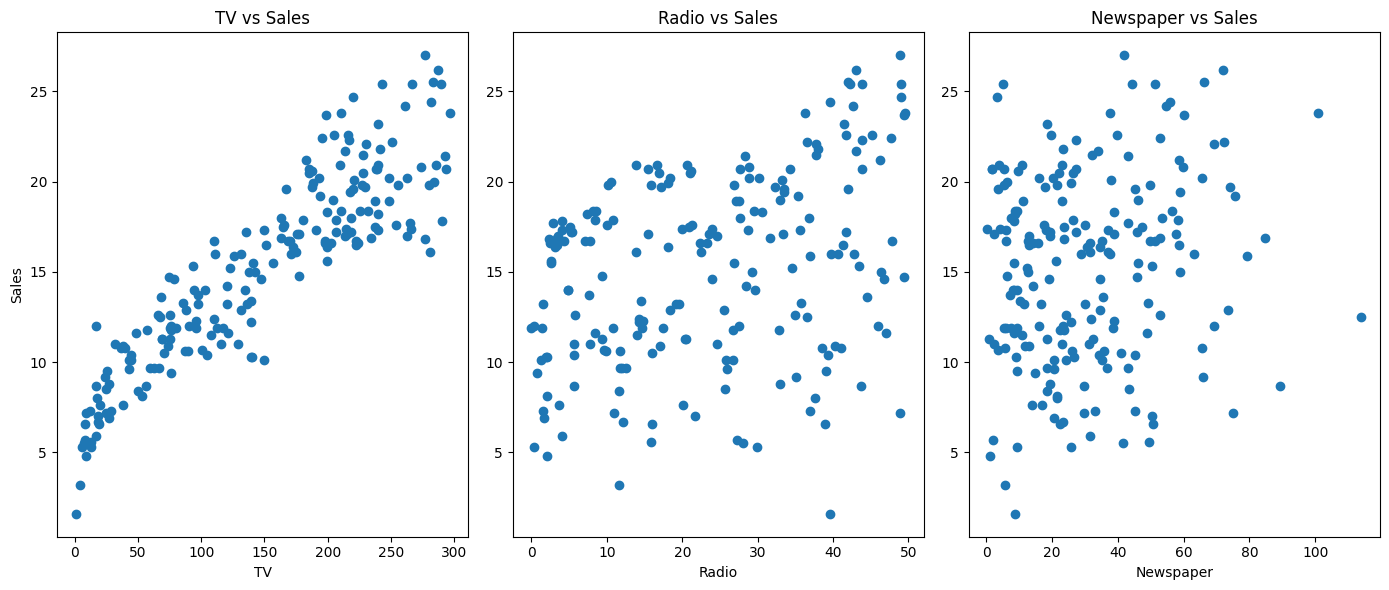

In [12]:
# Scatter plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio vs Sales')
plt.xlabel('Radio')

plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')

plt.tight_layout()
plt.show()


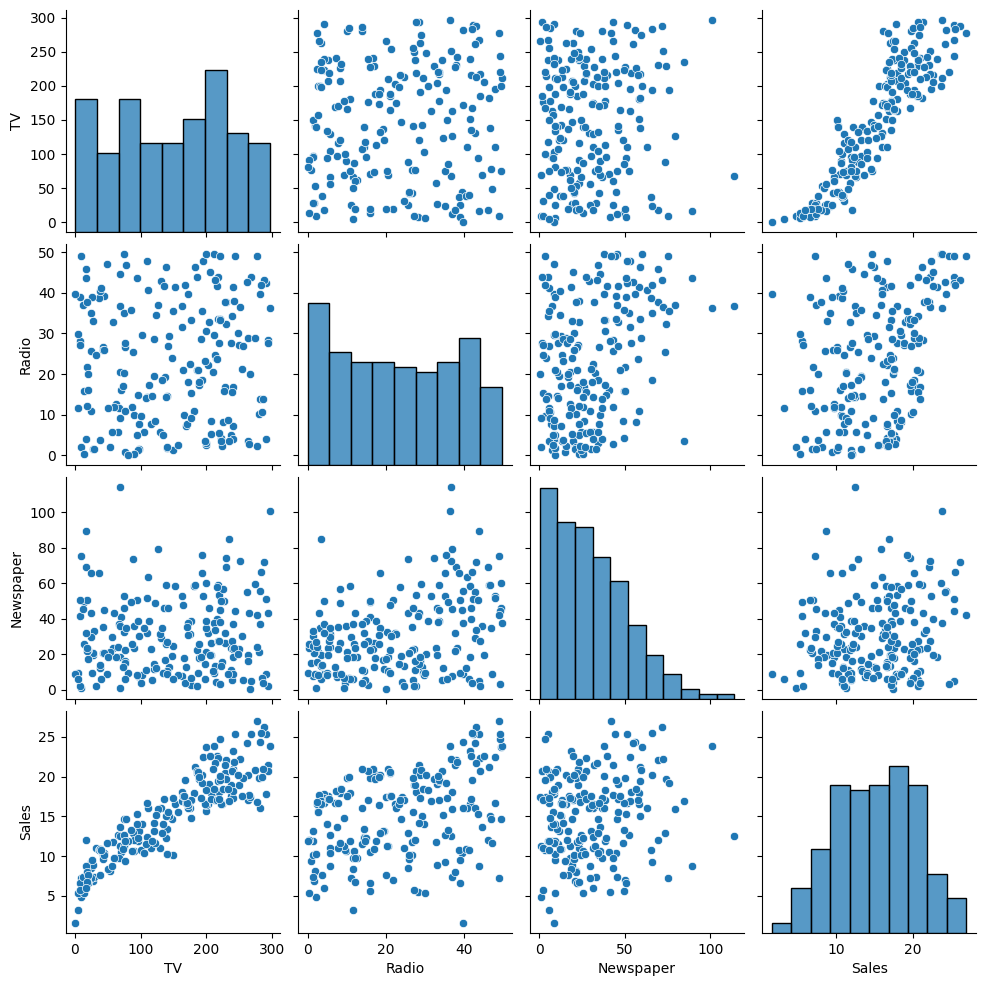

In [13]:
import seaborn as sns

# Pair plot
sns.pairplot(df)
plt.show()


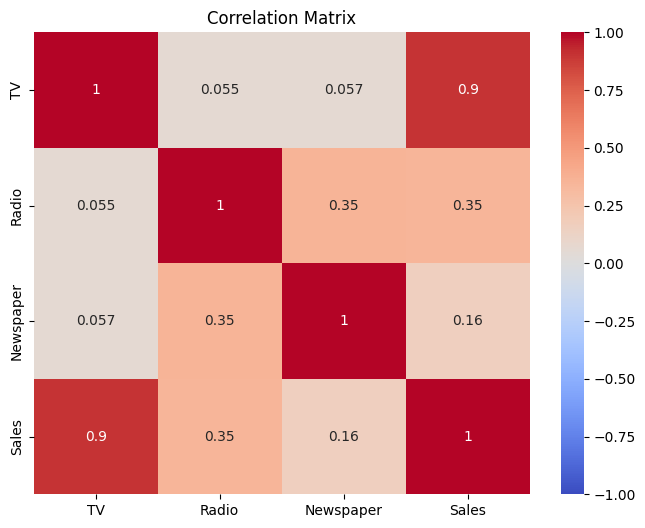

In [14]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


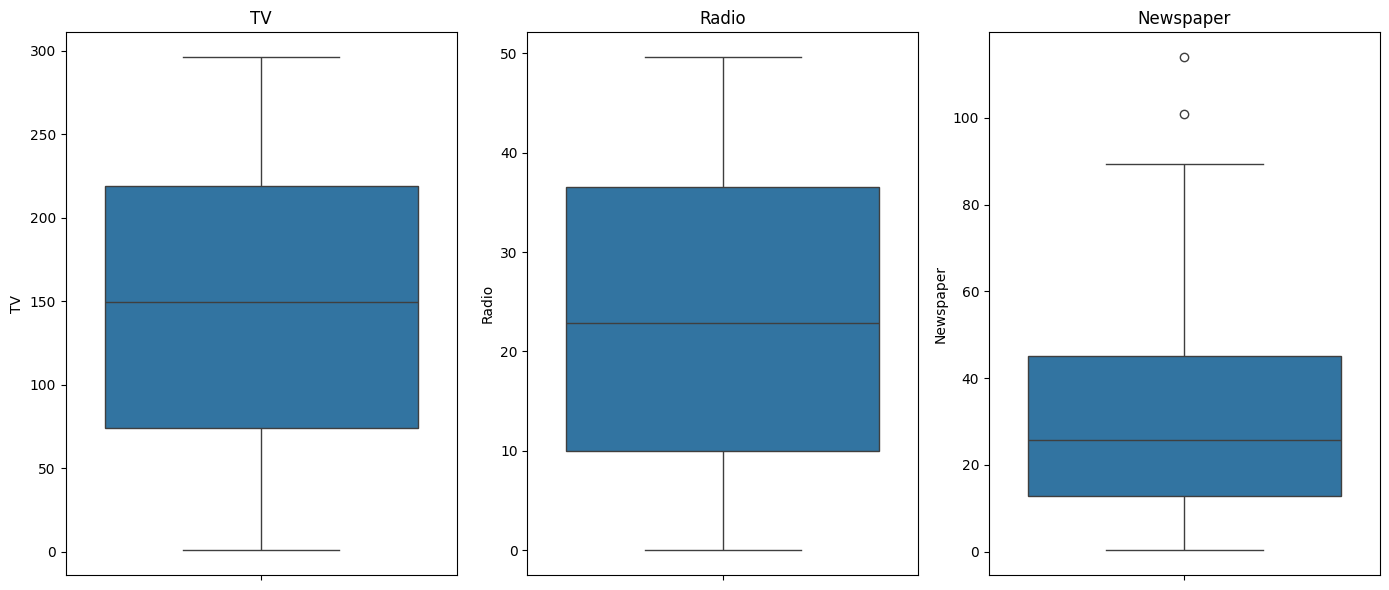

In [15]:
# Box plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['TV'])
plt.title('TV')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Radio'])
plt.title('Radio')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Newspaper'])
plt.title('Newspaper')

plt.tight_layout()
plt.show()


#### SPLITTING DATA 

In [4]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### TRAINING THE MODEL

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### EVALUATION

In [7]:
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.91


In [8]:
y_pred = model.predict(X_test)

#### VISUALIZATION 

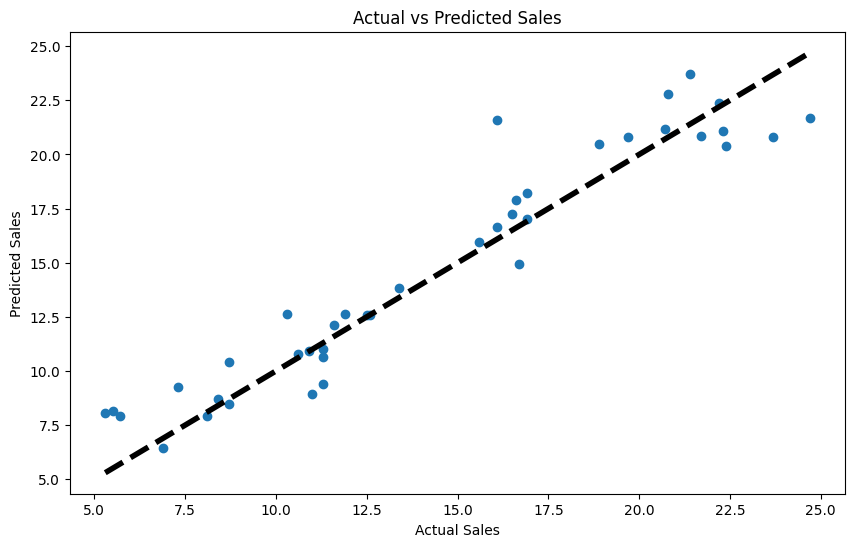

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()